# Regressão Linear - Predição da Idade

### importar bibliotecas

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### ler train.csv e test.csv

In [3]:
train = pd.read_csv('titanic/train.csv')
test = pd.read_csv('titanic/test.csv')


### transformar definir o Id do Passageiro como Index

In [4]:
train.set_index('PassengerId', inplace = True)

In [5]:
test.set_index('PassengerId', inplace = True)

### Verificar shape dos dois

In [6]:
train.shape , test.shape

((891, 11), (418, 10))

### Criar coluna "Survived" no test set

In [7]:
test['Survived']= np.nan

### Conferir shape novamente

In [8]:
test.shape

(418, 11)

### Concatenar train e test set

In [9]:
data = pd.concat([train , test], sort =False)

In [10]:
data.shape

(1309, 11)

### Traduzir colunas

In [11]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
 data.columns = ['Sobreviveu', 'Classe', 'Nome', 'Sexo', 'Idade', 'IrmaosConjuges', 'PaisFilhos', 'Bilhete',
       'Tarifa', 'Cabine', 'Embarque']



### Traduzir Sexo

In [13]:
data['Sexo']= data['Sexo'].map({'male': 'homem', 'female': 'mulher'})

In [14]:
data.Sexo

PassengerId
1        homem
2       mulher
3       mulher
4       mulher
5        homem
         ...  
1305     homem
1306    mulher
1307     homem
1308     homem
1309     homem
Name: Sexo, Length: 1309, dtype: object

### Averiguar dados nulos

In [18]:
data.isnull().sum()

Sobreviveu         418
Classe               0
Nome                 0
Sexo                 0
Idade              263
IrmaosConjuges       0
PaisFilhos           0
Bilhete              0
Tarifa               1
Cabine            1014
Embarque             2
dtype: int64

### Remover Cabine

In [19]:
data.drop('Cabine', axis=1, inplace = True)

### Checar dados nulos novamente

In [21]:
data.isnull().sum()

Sobreviveu        418
Classe              0
Nome                0
Sexo                0
Idade             263
IrmaosConjuges      0
PaisFilhos          0
Bilhete             0
Tarifa              1
Embarque            2
dtype: int64

### Preencher dados nulos de "Embarque" com a moda

In [23]:
data['Embarque'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [26]:
moda =data['Embarque'].mode()[0]

In [35]:
data['Embarque'].fillna(moda, inplace = True)

### Checar dados nulos novamente

In [37]:
data.isnull().sum()

Sobreviveu        418
Classe              0
Nome                0
Sexo                0
Idade             263
IrmaosConjuges      0
PaisFilhos          0
Bilhete             0
Tarifa              1
Embarque            0
dtype: int64

### Preencher "Tarifa" faltando com a média

In [38]:
media = data['Tarifa'].mean()

In [42]:
data['Tarifa'].fillna(media, inplace = True)

C:\Users\caiod\AppData\Local\Temp\ipykernel_4848\3281924696.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Tarifa'].fillna(media, inplace = True)


### Checar dados nulos

In [41]:
data.isnull().sum()

Sobreviveu        418
Classe              0
Nome                0
Sexo                0
Idade             263
IrmaosConjuges      0
PaisFilhos          0
Bilhete             0
Tarifa              0
Embarque            0
dtype: int64

### Verificar correlações

In [45]:
data.corr(numeric_only = True)

,Sobreviveu,Classe,Idade,IrmaosConjuges,PaisFilhos,Tarifa
Sobreviveu,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Classe,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558477
Idade,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.178229
IrmaosConjuges,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160224
PaisFilhos,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221522
Tarifa,0.257307,-0.558477,0.178229,0.160224,0.221522,1.000000


### Visualizar correlações com "heatmap"

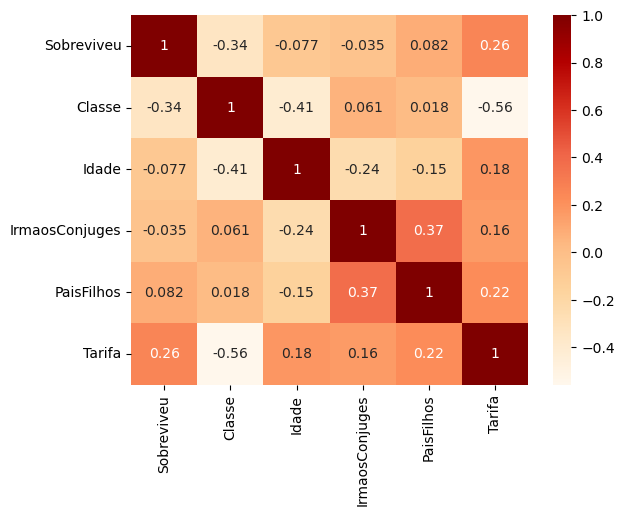

In [54]:
f, ax = plt.subplots(dpi=100)
sns.heatmap(data.corr(numeric_only=True), annot= True, cmap ='OrRd')
plt.show()

### Remover coluna "Sobreviveu"
Aparentemente não tem muita correlação com Idade, e está faltando bastante dados

In [55]:
data.drop('Sobreviveu',axis=1, inplace= True)

### Checar dados nulos

In [57]:
data.isnull().sum()

Classe              0
Nome                0
Sexo                0
Idade             263
IrmaosConjuges      0
PaisFilhos          0
Bilhete             0
Tarifa              0
Embarque            0
dtype: int64

# Engenharia de Recursos I

### Criar coluna "Titulo" baseando-se na coluna "Nome"

In [66]:
data['Titulo'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [64]:
data['Titulo']= data['Nome'].str.extract('([a-zA-Z]+)\.')

In [80]:
pd.crosstab(data['Titulo'], data['Sexo'])

Sexo,homem,mulher
Titulo,,
Capt,1,0
Col,4,0
Countess,0,1
Don,1,0
Dona,0,1
Dr,7,1
Jonkheer,1,0
Lady,0,1
Major,2,0


In [89]:
listaNomes =['Miss', 'Master', 'Mr', 'Mrs']

In [91]:
data['Titulo']= data['Titulo'].apply(lambda x: 'Outros' if x not in listaNomes else x) 

### Traduzir "Titulos"

In [92]:
pd.crosstab(data['Titulo'], data['Sexo'])

Sexo,homem,mulher
Titulo,,
Master,61,0
Miss,0,260
Mr,757,0
Mrs,0,197
Outros,25,9


In [96]:
titulo_traduzido = {
    'Master': 'Menino',
    'Miss': 'Solteira',
    'Mrs': 'MulherCasada',
    'Mr': 'HomemAdulto'
}

In [99]:
data['Titulo'] = data['Titulo'].map(titulo_traduzido)

### Averiguar informações do DataFrame

In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 1 to 1309
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Classe          1309 non-null   int64  
 1   Nome            1309 non-null   object 
 2   Sexo            1309 non-null   object 
 3   Idade           1046 non-null   float64
 4   IrmaosConjuges  1309 non-null   int64  
 5   PaisFilhos      1309 non-null   int64  
 6   Bilhete         1309 non-null   object 
 7   Tarifa          1309 non-null   float64
 8   Embarque        1309 non-null   object 
 9   Titulo          1275 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 112.5+ KB


### Remover "Bilhete" e "Nome"

In [103]:
data.drop('Bilhete', axis=1, inplace = True)

In [104]:
data.drop('Nome' , axis=1 , inplace = True)

# Engenharia de Recursos II

### Estudar possibilidade de identificar "meninas" similar aos "meninos"
Através da combinação: "solteira" e está com "pais"

### idade média de "meninas solteiras acompanhadas dos pais"

### verificar distribuição da idade

### Média de mulheres "solteiras"

### Distribuição das idades de mulheres "solteiras"

### Média de idade de mulheres "casadas"

### Distribuição das idades de mulheres "casadas"

### Adicionar coluna "solteira com pais"

### Transformar recursos categóricos em "dummies"

### Separar train e test para idades
* treinar com dados não nulos
* aplicar modelo em dados nulos

## Definir X e y para treinar o modelo

### Importar modelo regressivo

### Instanciar modelo

### Importar train_test_split para preparar para treino

### Dividir 70% para treinar, 30% para testar

### Treinar modelo

### Fazer predição

### Importar mean_squared_error (erro quadrado médio)

### Averiguar score

### Averiguar rmse

### Visualizar resíduos em scatterplot

<a name="tarifa"></a>

### Aplicar modelo nos dados nulos

### Criar coluna Idade contendos as predições

### Averiguar shapes

### Concatenar dados

### Criar DataFrame contendo "IdPassageiro" e "Idade"

### Salvar CSV com idade completa